In [1]:
%load_ext sql

# Conect to a Superstore Database

In [2]:
%sql sqlite:///superstore.db

# 1) Basic Comparison Operators

 Let's start with some operators you may remember from school (`>` and `<`) to compare whether one value is greater than or less than another.

 ## Filter the data with the WHERE clause

 For example, we can check to see if there have been any sales over** $10,000** in the orders table by writing the following query with WHERE:

In [4]:
%%sql
SELECT order_id, category, product_name,
       quantity, sales
  FROM orders
 WHERE sales > 10000
LIMIT 5;

 * sqlite:///superstore.db
Done.


order_id,category,product_name,quantity,sales
CA-2017-127180,Technology,Canon imageCLASS 2200 Advanced Copier,4,11199.968
CA-2014-145317,Technology,Cisco TelePresence System EX90 Videoconferencing Unit,6,22638.48
CA-2017-166709,Technology,Canon imageCLASS 2200 Advanced Copier,3,10499.97
CA-2016-118689,Technology,Canon imageCLASS 2200 Advanced Copier,5,17499.95
CA-2017-140151,Technology,Canon imageCLASS 2200 Advanced Copier,4,13999.96


## Instructions

Your supervisor is curious about sales that have **lost** the company money. They've asked you to look at orders that have lost more than** $1,000** in profit.

1. Write a query that includes `order_id`, `product_name`, `sales`, `discount`, and `profit`.

1. Filter your results so that your query only shows records that have lost more than $1000.

Tip: To show a $1000 loss, you'll need to write it as a negative number (-1000).

In [5]:
%%sql
SELECT order_id,
product_name,
sales,
discount,
profit
FROM orders
WHERE profit <-1000
LIMIT 10;

 * sqlite:///superstore.db
Done.


order_id,product_name,sales,discount,profit
US-2015-150630,"Riverside Palais Royal Lawyers Bookcase, Royale Cherry Finish",3083.43,0.5,-1665.0522
CA-2014-139892,Lexmark MX611dhe Monochrome Laser Printer,8159.952,0.4,-1359.992
US-2017-168116,Cubify CubeX 3D Printer Triple Head Print,7999.98,0.5,-3839.9904
CA-2016-130946,GBC DocuBind P400 Electric Binding System,1088.792,0.8,-1850.9464
CA-2017-158379,Martin Yale Chadless Opener Electric Letter Opener,4663.736,0.2,-1049.3406
CA-2014-145317,Cisco TelePresence System EX90 Videoconferencing Unit,22638.48,0.5,-1811.0784
CA-2017-152093,Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,762.594,0.8,-1143.891
US-2017-120390,GBC DocuBind P400 Electric Binding System,1633.188,0.7,-1306.5504
CA-2017-134845,Lexmark MX611dhe Monochrome Laser Printer,2549.985,0.7,-3399.98
CA-2015-147830,Cubify CubeX 3D Printer Double Head Print,1799.994,0.7,-2639.9912


# 2) Order of Execution

As we learn more and more clauses, it helps to know the order in which SQL executes them. Let's look at the execution order of clauses:

1. FROM: The first thing SQL does when it runs a query is determine what data it will be looking at. Thus, it executes `FROM` first.

1. WHERE: After executing `FROM`, SQL filters the results using WHERE.

1. SELECT: Next in the order of execution is `SELECT`. After determining the table we're getting data from and filtering the records, SQL will choose the selected columns.

1. LIMIT: Finally, SQL limits the results with LIMIT (if this clause is used in the query).

The reason order of execution is so important to learn about at this stage of our SQL learning journey is because **aliasing**, which we've seen in the SELECT clause, **cannot be referenced in the WHERE clause**, since the alias "doesn't exist" yet.

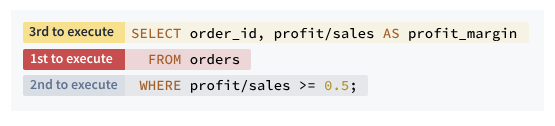

## Instructions

Your supervisor is curious about the **cheapest** items sold from the orders table.

1. Write a query that includes `order_id`, `subcategory`, `product_name`, and a calculated field aliased `price_per_unit`.

1. Filter your query so you only see records with a `price_per_unit` less than $0.50.

In [7]:
%%sql
SELECT order_id,
subcategory,
product_name,
sales/quantity as price_per_unit
from orders
WHERE sales/quantity < 0.50
LIMIT 5;

 * sqlite:///superstore.db
Done.


order_id,subcategory,product_name,price_per_unit
US-2017-118038,Binders,Economy Binders,0.416
US-2015-161991,Binders,Round Ring Binders,0.41600000000000004
US-2015-149692,Binders,Avery Reinforcements for Hole-Punch Pages,0.39599999999999996
CA-2014-122567,Binders,Wilson Jones Easy Flow II Sheet Lifters,0.36000000000000004
CA-2017-144064,Binders,Wilson Jones Easy Flow II Sheet Lifters,0.36000000000000004


# 3) Comparison Operators Continued


Operator

    =	Equal to

    >=	Greater than or equal to

    <=	Less than or equal to

    <>	Not equal to

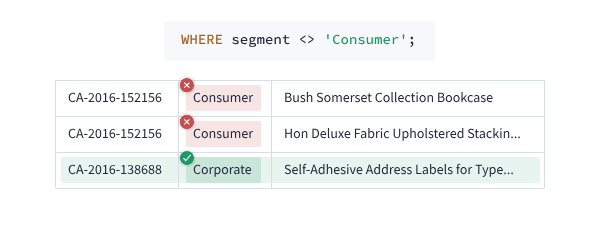

Keep in mind that this search is case sensitive, so while many records in `region` are equal to '`West`', none are equal to capital '`WEST`':

# 4) Checking for Membership in a Consecutive Range

let's find all the records in `orders` where between **two** and **four** units were sold. Here's another example where SQL syntax and plain English are similar, with use of the `BETWEEN` operator:

In [9]:
%%sql
SELECT order_id, product_name, quantity
  FROM orders
 WHERE quantity BETWEEN 2 AND 4
LIMIT 5;

 * sqlite:///superstore.db
Done.


order_id,product_name,quantity
CA-2016-152156,Bush Somerset Collection Bookcase,2
CA-2016-152156,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",3
CA-2016-138688,Self-Adhesive Address Labels for Typewriters by Universal,2
US-2015-108966,Eldon Fold 'N Roll Cart System,2
CA-2014-115812,Newell 322,4


The `BETWEEN` operator checks whether the value in the quantity column is within the specified range. Since the BETWEEN operator is inclusive, it will include records with quantity values of 2, 3, and 4.

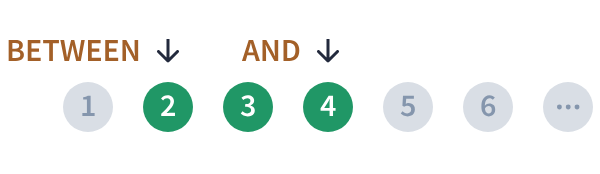

## Instructions

1. Write a query that returns the `order_id`, `product_id`, and a field that shows a 10% sales tax on sales, aliased as `sales_tax`.

1. Get the records where the resulting sales tax is between 1 and 2 dollars.

In [10]:
%%sql
SELECT order_id,
product_id,
sales*0.10 as sales_tax
from orders
WHERE sales*0.10 BETWEEN 1 and 2
LIMIT 5;

 * sqlite:///superstore.db
Done.


order_id,product_id,sales_tax
CA-2016-138688,OFF-LA-10000240,1.462
CA-2014-115812,OFF-BI-10003910,1.8504000000000003
CA-2017-114412,OFF-PA-10002365,1.5552000000000001
CA-2016-137330,OFF-AR-10000246,1.9460000000000002
CA-2016-121755,OFF-BI-10001634,1.1648


# 5) Checking for Membership in a Non-Consecutive Range

The `BETWEEN` statement is good for eliminating the use of multiple comparison operators and finding values in a consecutive range, but what if we're seeking a non-consecutive range?

For example, what if we wanted to find the order records with specific discount amounts?

Superstore usually offers discounts as multiples of 10% (i.e. 10%, 20%, 30%), but there have been three unusual discount amounts: 15%, 32%, and 45%. The IN operator is perfect for filtering for multiple unique values like this.

The `IN` operator checks if the value in the discount column is equal to any of the values listed within the parentheses (0.15, 0.32, or 0.45).

In [11]:
%%sql
SELECT order_id, category, subcategory,
       product_name, sales, discount
  FROM orders
 WHERE discount IN (0.15, 0.32, 0.45)
 lIMIT 5;

 * sqlite:///superstore.db
Done.


order_id,category,subcategory,product_name,sales,discount
US-2015-108966,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,0.45
CA-2015-117415,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Custom Colors",532.3992,0.32
US-2017-100930,Furniture,Tables,Bush Advantage Collection Round Conference Table,233.86,0.45
US-2017-100930,Furniture,Tables,Bretford Rectangular Conference Table Tops,620.6145,0.45
US-2015-168935,Furniture,Tables,"Hon Practical Foundations 30 x 60 Training Table, Light Gray/Charcoal",375.4575,0.45


## Instructions

Your manager wants to celebrate Pi Day (March 14th) by offering a promotion on sales that cost exactly $3, $14, or $15 in honor of the first 5 digits of pi (3.1415), but has asked you to check if there are enough sales with those amounts to be worth it.

1. Write a query that includes `order_id`, `product_name`, `sales`, and `quantity` from the `orders` table.
1. Include only the following sales amounts: 3 14 15


In [12]:
%%sql
SELECT order_id,
product_name,
sales,
quantity
FROM orders
WHERE sales in (3,14,15)

 * sqlite:///superstore.db
Done.


order_id,product_name,sales,quantity
CA-2014-131905,Avery 480,15.0,4
CA-2016-111409,Avery 480,3.0,1
CA-2014-133830,Advantus Plastic Paper Clips,15.0,3
US-2017-132031,Avery 496,3.0,1
CA-2016-126627,"Eldon 400 Class Desk Accessories, Black Carbon",14.0,4


# 6) Checking for Missing Values

SQL has a reserved value, NULL, to indicate missing records in the database, so let's investigate missing values in our database.

You've heard there are some records that are missing their `postal_code` value, so let's try to write a query that identifies them:

In [13]:
%%sql
SELECT order_id, postal_code
  FROM orders
 WHERE postal_code = NULL;

 * sqlite:///superstore.db
Done.


order_id,postal_code


No results! Here's why. One way of thinking about missing values is as unknown values. If a value is *unknown*, we can't really say that it's different from another value, nor can we say it's equal.

In SQL, conditions can evaluate to **True** or **False**, but they can also evaluate as "unknown". This is known as three-valued logic. Unless something is true, WHERE won't capture it, hence the behavior above.

So how do we correctly use the NULL keyword? Instead of using mathematical comparators like `=` or `<>`, we have to use the `IS` or `IS NOT` operators:

In [14]:
%%sql
SELECT order_id, postal_code
  FROM orders
 WHERE postal_code IS NULL;

 * sqlite:///superstore.db
Done.


order_id,postal_code
CA-2017-104066,None
CA-2015-162887,None
US-2016-150140,None
US-2016-165505,None
US-2016-165505,None
US-2016-165505,None
US-2017-127292,None
US-2017-127292,None
US-2017-127292,None
US-2017-127292,None


## Instructions

Your manager has noticed some missing values in the `segment` field and isn't sure if it's due to poor data quality or customer error.

1. Write a query that identifies all missing values from the segment field.

1. Include all fields.

1. After you run your query, write an inline comment with any trends in the missing data.


In [17]:
%%sql
SELECT *
from orders
WHERE segment is NULL;

 * sqlite:///superstore.db
Done.


order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit


# 7) AND Statements

So far we've been filtering our SQL tables by one condition, using statements like `<`, `BETWEEN`, and `IS NULL`. We can combine multiple conditions with the `AND` operator.

For example, the merchandising team at Superstore is considering a promotion for all products in the '`Office Supplies`' category for the '`West`' region and would like us to pull historical order data.

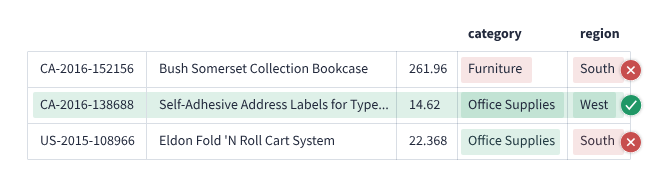

In this case, we can join the two filters together with `WHERE` and `AND`:

In [19]:
%%sql
SELECT order_id, product_id,
       product_name, sales
  FROM orders
WHERE category = 'Office Supplies'
AND region = 'West'
lIMIT 5;

 * sqlite:///superstore.db
Done.


order_id,product_id,product_name,sales
CA-2016-138688,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters by Universal,14.62
CA-2014-115812,OFF-AR-10002833,Newell 322,7.28
CA-2014-115812,OFF-BI-10003910,DXL Angle-View Binders with Locking Rings by Samsill,18.504
CA-2014-115812,OFF-AP-10002892,Belkin F5C206VTEL 6 Outlet Surge,114.9
CA-2016-161389,OFF-BI-10003656,Fellowes PB200 Plastic Comb Binding Machine,407.976


## INSTRUCTIONS

Your manager would like to study the most expensive items from the '`Storage`' subcategory.

1. Write a query to select at least `product_name` and a calculated field aliased as `price_per_unit` that divides `sales` by `quantity`.

1. Only select records in 'Storage' where the price per unit is more than $300.

In [20]:
%%sql
SELECT product_name,
sales/quantity as price_per_unit
from orders
WHERE subcategory = 'Storage'
AND sales/quantity >300
LiMIT 5;

 * sqlite:///superstore.db
Done.


product_name,price_per_unit
Deluxe Rollaway Locking File with Drawer,332.704
Tennsco Single-Tier Lockers,375.34
Tennsco 16-Compartment Lockers with Coat Rack,647.89
Smead Adjustable Mobile File Trolley with Lockable Top,335.35200000000003
Deluxe Rollaway Locking File with Drawer,415.88000000000005


# 8) OR Statement

Another useful operator to know is `OR`, which complements the WHERE clause. Unlike `AND`, `OR` will return all the records that meet **at least one** of its conditions.

For example, the merchandising team would like a list of all transactions that are either in the Furniture category *or* where the sales are greater than $100.

In general, we can expect **more** resulting records from an OR statement versus AND, as not all conditions must be met as with AND

## Instructions

Your manager wants to identify products that perform poorly because they either:

* Generating a negative profit, or

* Selling only in individual quantities

They have tasked you with identifying these products.

1. Write a query that includes at least product_name, profit, and quantity.

1. Apply a filter to select products with profits less than $0 or quantities equal to 1.